In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
file_path ='/home/radovan/git/rmiucic/CarND-Path-Planning-Project/src/out.csv'
df = pd.read_csv(file_path)

In [29]:
file_path ='/home/radovan/git/rmiucic/CarND-Path-Planning-Project/src/out_spline.csv'
df_spline = pd.read_csv(file_path,index_col=False)

In [46]:
file_path ='/home/radovan/git/rmiucic/CarND-Path-Planning-Project/data/highway_map.csv'


df_map = pd.read_csv(file_path,delim_whitespace=True,header=None,names=['map_x','map_y','map_s','map_dx','map_dy'],index_col=False)

(53.06732999999997, 2441.9872700000001, 1041.5423000000001, 3093.1896999999999)

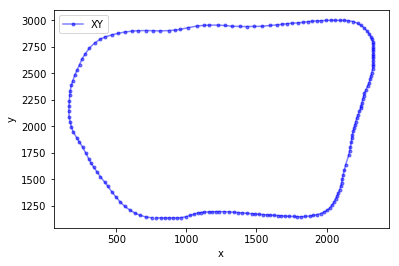

In [53]:
plt.subplot(1,1,1)
plt.plot(df_map["map_x"],df_map["map_y"],'b.-',alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['XY'])
#plt.axis('equal')
plt.axis('tight')

(-9.0, 189.0, -345.70746288299551, 7259.8567205429044)

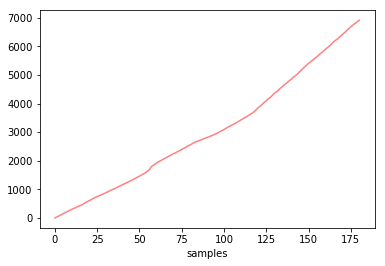

In [54]:
plt.subplot(1,1,1)
plt.plot(range(len(df_map)),df_map["map_s"],'r',alpha=0.5)
plt.xlabel("samples")
#plt.axis('equal')
plt.axis('tight')

In [50]:
df_map

,map_x,map_y,map_s,map_dx,map_dy
0,784.6001,1135.571,0.000000,-0.023598,-0.999722
1,815.2679,1134.930,30.674479,-0.010995,-0.999940
2,844.6398,1134.911,60.046371,-0.002048,-0.999998
3,875.0436,1134.808,90.450415,-0.001848,-0.999998
4,905.2830,1134.799,120.689735,0.004131,-0.999992
5,934.9677,1135.055,150.375551,0.059044,-0.998255
6,964.7734,1138.318,180.359314,0.167776,-0.985825
7,995.2703,1145.318,211.649355,0.307789,-0.951455
8,1025.0280,1157.810,243.922915,0.382558,-0.923932
9,1054.4980,1169.842,275.754606,0.381560,-0.924344


In [30]:
df_spline.head(100)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4
0,-1.0000,0.000000,0,0,30.5722,0.905784,60.9966,4.80103,91.0487,12.3482
1,-0.0021,0.000000,0,0,30.5717,0.916678,60.9941,4.82343,91.0410,12.3870
2,-0.0040,0.000000,0,0,30.5716,0.917102,60.9939,4.82430,91.0406,12.3885
3,-0.0060,0.000000,0,0,30.5717,0.917766,60.9939,4.82566,91.0403,12.3908
4,-0.0080,0.000000,0,0,30.5716,0.919507,60.9935,4.82924,91.0390,12.3970
5,-0.0100,0.000000,0,0,30.5713,0.922761,60.9926,4.83593,91.0366,12.4086
6,-0.0120,0.000000,0,0,30.5712,0.925373,60.9920,4.84130,91.0347,12.4179
7,-0.0140,0.000000,0,0,30.5710,0.929955,60.9910,4.85072,91.0315,12.4342
8,-0.0160,0.000000,0,0,30.5707,0.933426,60.9901,4.85785,91.0289,12.4465
9,-0.0180,0.000000,0,0,30.5706,0.937355,60.9893,4.86593,91.0262,12.4605


(-140.70000000000002,
 2954.6999999999998,
 -5.6708050000000005,
 97.086905000000002)

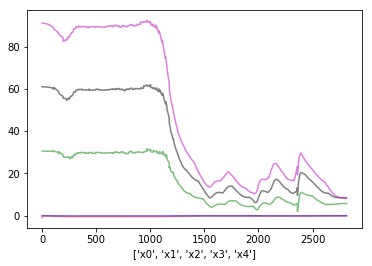

In [28]:
df_spline_m1=df_spline[:-1]
plt.subplot(1,1,1)
plt.plot(range(len(df_spline_m1)),df_spline_m1["x0"],'r',alpha=0.5)
plt.plot(range(len(df_spline_m1)),df_spline_m1["x1"],'b',alpha=0.5)
plt.plot(range(len(df_spline_m1)),df_spline_m1["x2"],'g',alpha=0.5)
plt.plot(range(len(df_spline_m1)),df_spline_m1["x3"],'k',alpha=0.5)
plt.plot(range(len(df_spline_m1)),df_spline_m1["x4"],'m',alpha=0.5)
#plt.plot(range(len(df)),df["ref_vel"],'b',alpha=0.5)
plt.xlabel(["x0","x1","x2","x3","x4"])
plt.axis('tight')

In [33]:
df

,time_step,RV_id,RV_s,RV_d,RV_speed,HV_s,HV_d,HV_x,HV_y,HV_yaw,HV_speed,ref_vel,RV_in_HV_lane,RV_in_L0_zone,RV_in_L1_zone,RV_in_L2_zone,lane,state,previous_path_x_size
0,1,0,6721.840,-277.67300,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
1,1,1,6719.220,-280.14900,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
2,1,2,6716.600,-282.90200,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
3,1,3,6713.910,-285.72700,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
4,1,4,6711.570,-288.19000,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
5,1,5,6661.770,-291.78000,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
6,1,6,6711.780,-268.09600,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
7,1,7,6709.300,-270.70400,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
8,1,8,6663.540,-273.18300,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0
9,1,9,6660.440,-275.55100,0.00000,124.834,6.16483,909.480,1128.67,0.0000,0.000000,0.224,0,0,0,0,1,1,0


In [5]:
len(df)

37536

(-1846.75, 38781.75, -4.3571949999999999, 91.501095000000007)

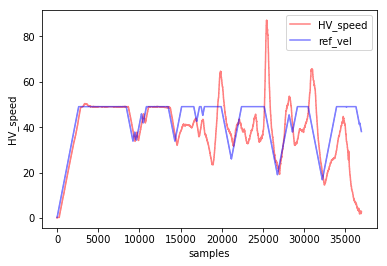

In [34]:
plt.subplot(1,1,1)
plt.plot(range(len(df)),df["HV_speed"],'r',alpha=0.5)
plt.plot(range(len(df)),df["ref_vel"],'b',alpha=0.5)
plt.xlabel("samples")
plt.ylabel("HV_speed")
plt.legend(['HV_speed','ref_vel'])
#plt.axis('equal')
plt.axis('tight')


(-1846.75, 38781.75, -2.4500000000000002, 51.450000000000003)

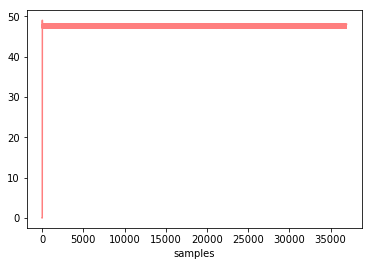

In [35]:
plt.subplot(1,1,1)
plt.plot(range(len(df)),df["previous_path_x_size"],'r',alpha=0.5)
#plt.plot(range(len(df)),df["ref_vel"],'b',alpha=0.5)
plt.xlabel("samples")
plt.axis('tight')

(-1846.75, 38781.75, -130.11510600000003, 2763.9273860000003)

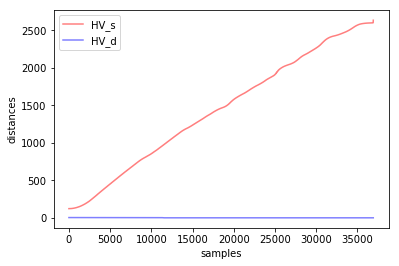

In [36]:
plt.subplot(1,1,1)
plt.plot(range(len(df)),df["HV_s"],'r',alpha=0.5)
plt.plot(range(len(df)),df["HV_d"],'b',alpha=0.5)
plt.xlabel("samples")
plt.ylabel("distances")
plt.legend(['HV_s','HV_d'])
#plt.axis('equal')
plt.axis('tight')

(-1846.75, 38781.75, 1.1874994999999999, 6.5726705000000001)

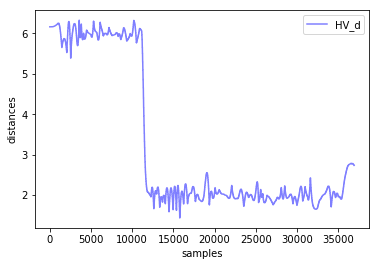

In [37]:
plt.subplot(1,1,1)
plt.plot(range(len(df)),df["HV_d"],'b',alpha=0.5)
plt.xlabel("samples")
plt.ylabel("distances")
plt.legend(['HV_d'])
#plt.axis('equal')
plt.axis('tight')

(838.62800000000004,
 2397.3719999999998,
 1059.5105000000001,
 2581.0195000000003)

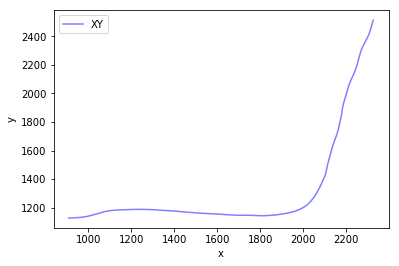

In [39]:
plt.subplot(1,1,1)
plt.plot(df["HV_x"],df["HV_y"],'b',alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['XY'])
#plt.axis('equal')
plt.axis('tight')

(-1846.75, 38781.75, -17.9968, 377.93279999999999)

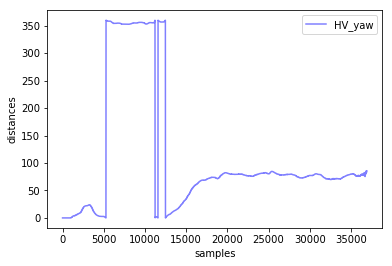

In [40]:
plt.subplot(1,1,1)
plt.plot(range(len(df)),df["HV_yaw"],'b',alpha=0.5)
plt.xlabel("samples")
plt.ylabel("distances")
plt.legend(['HV_yaw'])
#plt.axis('equal')
plt.axis('tight')